#  Head-on collision of gravitational plane waves with noncollinear polarization by Tsoubelis and Wang
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

Here we concentrate on equation and metric 4.4

http://galaxy.cti.gr/dep/sites/default/files/[1991]_Head-on%20collision%20of%20gravitational%20plane%20waves%20with%20noncollinear%20polarization.%20a%20new%20class%20of%20analytic%20models.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
chi = Function('chi')(u,v)
chi

In [9]:
q2 = Function('q2')(u,v)
q2

In [7]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix([du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [10]:
lineElement = expand( 2*exp(-M)*du*dv -exp(-U)* (chi * dx**2 + chi**-1 * (dy - q2 * dx)**2 ))
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                                               ⎤
⎢    0      ℯ                              0                              0         ⎥
⎢                                                                                   ⎥
⎢ -M(u, v)                                                                          ⎥
⎢ℯ              0                          0                              0         ⎥
⎢                                                                                   ⎥
⎢                                              2        -U(u, v)            -U(u, v)⎥
⎢                                 -U(u, v)   q₂ (u, v)⋅ℯ          q₂(u, v)⋅ℯ        ⎥
⎢    0          0      - χ(u, v)⋅ℯ         - ───────────────────  ──────────────────⎥
⎢                                                  χ(u, v)             χ(u, v)      ⎥
⎢                                                                                   ⎥
⎢                                           -U(u, v)  

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                                               ⎤
⎢    0      ℯ                              0                              0         ⎥
⎢                                                                                   ⎥
⎢ -M(u, v)                                                                          ⎥
⎢ℯ              0                          0                              0         ⎥
⎢                                                                                   ⎥
⎢                                              2        -U(u, v)            -U(u, v)⎥
⎢                                 -U(u, v)   q₂ (u, v)⋅ℯ          q₂(u, v)⋅ℯ        ⎥
⎢    0          0      - χ(u, v)⋅ℯ         - ───────────────────  ──────────────────⎥
⎢                                                  χ(u, v)             χ(u, v)      ⎥
⎢                                                                                   ⎥
⎢                                           -U(u, v)  

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                                                           
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                                                           
⎢⎢                                                                                          
⎢⎢                 ⎛   3       ∂              2       ∂               

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡    ⎛                                         2       2         ⎞                         2
⎢    ⎜  ∂           ∂             ⎛∂          ⎞       ∂          ⎟  2         ⎛∂          ⎞ 
⎢    ⎜2⋅──(M(u, v))⋅──(U(u, v)) - ⎜──(U(u, v))⎟  + 2⋅───(U(u, v))⎟⋅χ (u, v) - ⎜──(χ(u, v))⎟ 
⎢    ⎜  ∂u          ∂u            ⎝∂u         ⎠        2         ⎟            ⎝∂u         ⎠ 
⎢    ⎝                                               ∂u          ⎠                          
⎢    ───────────────────────────────────────────────────────────────────────────────────────
⎢                                                       2                                   
⎢                                                    2⋅χ (u, v)                             
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

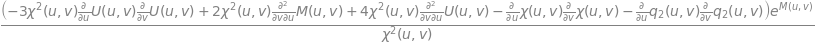

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                 ⎛         
⎢                                                                                 ⎜  ∂      
⎢                                                                                 ⎜2⋅──(M(u,
⎢                                                                                 ⎜  ∂u     
⎢                                                                                 ⎝         
⎢                                                                                 ──────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢      ⎛                                                     2        

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡           ⎛                                         2       2         ⎞                   
⎢           ⎜  ∂           ∂             ⎛∂          ⎞       ∂          ⎟  2         ⎛∂     
⎢           ⎜2⋅──(M(u, v))⋅──(U(u, v)) - ⎜──(U(u, v))⎟  + 2⋅───(U(u, v))⎟⋅χ (u, v) - ⎜──(χ(u
⎢           ⎜  ∂u          ∂u            ⎝∂u         ⎠        2         ⎟            ⎝∂u    
⎢           ⎝                                               ∂u          ⎠                   
⎢           ────────────────────────────────────────────────────────────────────────────────
⎢                                                              2                            
⎢                                                           2⋅χ (u, v)                      
⎢                                                                                           
⎢                                                                                           
⎢⎛                                 2                  2          ⎞    

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡⎛                                         2       2         ⎞                         2    
⎢⎜  ∂           ∂             ⎛∂          ⎞       ∂          ⎟  2         ⎛∂          ⎞    ⎛
⎢⎜2⋅──(M(u, v))⋅──(U(u, v)) - ⎜──(U(u, v))⎟  + 2⋅───(U(u, v))⎟⋅χ (u, v) - ⎜──(χ(u, v))⎟  - ⎜
⎢⎜  ∂u          ∂u            ⎝∂u         ⎠        2         ⎟            ⎝∂u         ⎠    ⎝
⎢⎝                                               ∂u          ⎠                              
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                   2                                       
⎢                                                2⋅χ (u, v)                                 
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

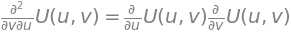

In [37]:
d2ududv = Eq(diff(U,u,v), solve( einsteinSimplified[1,0], diff(U,u,v) )[0] ) 
d2ududv

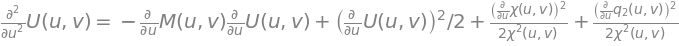

In [38]:
d2udu2 = Eq(diff(U,u,u), expand( solve( einsteinSimplified[0,0].args[2], diff(U,u,u))[0] ) ) 
d2udu2 

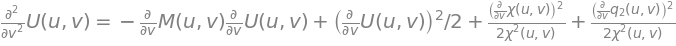

In [39]:
d2udv2 = Eq(diff(U,v,v), expand( solve( einsteinSimplified[1,1].args[2], diff(U,v,v))[0] ) ) 
d2udv2

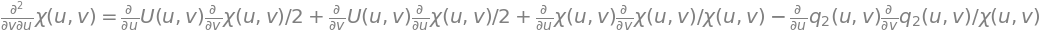

In [48]:
d2chidudv = Eq( diff(chi,u,v), solve( ricciSimplified[3,3].args[1], diff(chi,u,v) )[0] ).subs(d2ududv.lhs,d2ududv.rhs)
d2chidudv

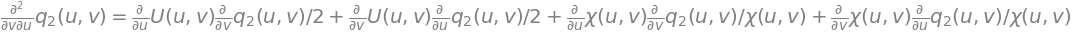

In [63]:
d2q2dudv = Eq(diff(q2,u,v), expand( expand( solve( ricciSimplified[2,3].args[1], diff(q2,u,v) )[0] ) ).subs(d2ududv.lhs,d2ududv.rhs).subs(d2chidudv.lhs,d2chidudv.rhs)).simplify()
d2q2dudv